

## **Assignment: NumPy Operations, MNIST, and SVD**

### **Objective**
1. Practice basic NumPy operations (concatenation, broadcasting).
2. Load and explore the MNIST dataset.
3. Perform SVD decomposition on MNIST images.
4. Use truncated SVD for dimensionality reduction.
5. Visualize how well compressed data can be reconstructed.

---

## **Assignment Questions**

1. **NumPy Operations**  
   - Show how concatenation differs along `axis=0` vs `axis=1`. Provide an example.  
   - Demonstrate broadcasting by adding a 2D array to a 1D array. Explain why it works.

2. **SVD Basics**  
   - In your own words, describe the matrices \(U\), \(\Sigma\), and \(V^T\) from the SVD and how they relate to the original data matrix \(X\).

3. **MNIST Dimensionality Reduction**  
   - Explain why we might want to reduce the dimensionality of MNIST images. What are the benefits?  
   - Provide a plot of reconstruction error as a function of the rank \(k\).  
   - Show a few reconstructed images for \(k = 20\), \(k = 50\), \(k = 100\), etc. Comment on the visual differences.

4. **Further Exploration**  
   - If time/resources allow, compare using SVD to other dimensionality reduction techniques (like PCA or autoencoders, if you know about them).  

---

### **Submission Instructions**

1. Make sure your notebook is properly **annotated** with markdown cells explaining your code and results.  
2. Provide answers to the **Assignment Questions** in text cells.  
3. Include **plots** and **output** in your submission.  

**Congratulations!** You’ve performed a fundamental SVD-based dimensionality reduction on MNIST and explored basic NumPy operations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Set a seed for reproducibility
np.random.seed(42)


### **Part 1: Introduction to NumPy**

We will explore simple NumPy operations such as **array creation**, **concatenation**, and **broadcasting**.

#### **1.1 Array Creation**



In [2]:
# Set a seed for reproducibility
np.random.seed(42)

# Create two random arrays
A = np.random.randint(0, 10, (3, 3))  # 3x3 matrix of integers
B = np.random.randint(0, 10, (3, 3))

# Print arrays
print("Array A:\n", A)
print("\nArray B:\n", B)

# Print shapes
print("\nShape of A:", A.shape)
print("Shape of B:", B.shape)

# Reshape A into a 1D array using ravel
A_ravel = A.ravel()

# Print reshaped array and its shape
print("\nFlattened A (1D array):", A_ravel)
print("Shape of Flattened A:", A_ravel.shape)


Array A:
 [[6 3 7]
 [4 6 9]
 [2 6 7]]

Array B:
 [[4 3 7]
 [7 2 5]
 [4 1 7]]

Shape of A: (3, 3)
Shape of B: (3, 3)

Flattened A (1D array): [6 3 7 4 6 9 2 6 7]
Shape of Flattened A: (9,)


#### **1.2 Concatenation**

#### Difference Between `axis=0` and `axis=1` in Concatenation
In NumPy, the `axis` parameter determines how arrays are concatenated or manipulated.

`axis=0` (Vertical Concatenation / Row-wise stacking)

Stacks arrays on top of each other.
The number of rows increases, while the number of columns remains the same.
Example: If `A` and `B` are (3,3) matrices, the resulting matrix will be (6,3).
`axis=1` (Horizontal Concatenation / Column-wise stacking)

Stacks arrays side by side.
The number of columns increases, while the number of rows remains the same.
Example: If `A` and `B` are (3,3) matrices, the resulting matrix will be (3,6).

In [3]:
# Concatenation along axis=0 (vertical)
C_vertical = np.concatenate((A, B), axis=0)

# Concatenation along axis=1 (horizontal)
C_horizontal = np.concatenate((A, B), axis=1)

# Print results
print("\nVertical Concatenation (axis=0):\n", C_vertical)
print("\nShape of Vertical Concatenation:", C_vertical.shape)

print("\nHorizontal Concatenation (axis=1):\n", C_horizontal)
print("\nShape of Horizontal Concatenation:", C_horizontal.shape)


Vertical Concatenation (axis=0):
 [[6 3 7]
 [4 6 9]
 [2 6 7]
 [4 3 7]
 [7 2 5]
 [4 1 7]]

Shape of Vertical Concatenation: (6, 3)

Horizontal Concatenation (axis=1):
 [[6 3 7 4 3 7]
 [4 6 9 7 2 5]
 [2 6 7 4 1 7]]

Shape of Horizontal Concatenation: (3, 6)


#### **1.3 Broadcasting**

#### Explanation of Broadcasting
Broadcasting in NumPy allows operations between arrays of different shapes by expanding their dimensions to match each other without copying data.

Shapes of Given Vectors:

`col_vec`: (3,1) → A column vector (3 rows, 1 column).

`row_vec`: (1,3) → A row vector (1 row, 3 columns).
Broadcasting Mechanism:

NumPy expands the smaller dimension to match the larger one without duplicating the data.

In this case:

`col_vec` (3,1) expands across columns to (3,3).

`row_vec` (1,3) expands across rows to (3,3).
The operation is then performed elementwise on these expanded versions.

In [4]:
# Create a 3x1 column vector and a 1x3 row vector
col_vec = np.array([[1], [2], [3]])   # Shape (3,1)
row_vec = np.array([[1, 2, 3]])       # Shape (1,3)

# Print the original vectors
print("Column Vector:\n", col_vec)
print("\nRow Vector:\n", row_vec)

# Perform elementwise broadcasting addition
broadcast_sum = col_vec + row_vec
print("\nBroadcasted Sum:\n", broadcast_sum)

# Perform elementwise broadcasting multiplication
broadcast_product = col_vec * row_vec
print("\nBroadcasted Product:\n", broadcast_product)

Column Vector:
 [[1]
 [2]
 [3]]

Row Vector:
 [[1 2 3]]

Broadcasted Sum:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]

Broadcasted Product:
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


#### **2.1 Loading the Data**


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


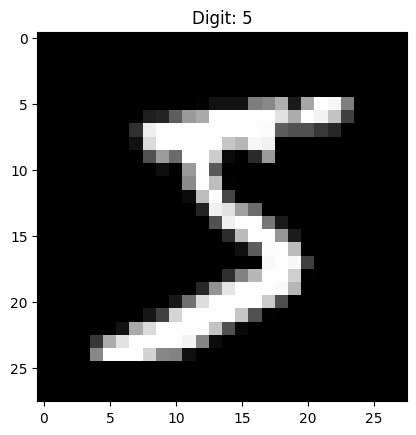

In [5]:
# Load MNIST from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Display a sample digit
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Digit: {y_train[0]}")
plt.show()

### **Part 3: SVD Decomposition**

We will demonstrate how to perform the Singular Value Decomposition (SVD) on MNIST images.

#### **3.1 Flattening the MNIST Images**

Typically, images are 2D (28×28). For SVD on each image individually or on a batch, we often need 2D data (samples × features).  

In [6]:
# Flatten each 28x28 image into a 784-dimensional vector
x_train_flat = x_train.reshape((-1, 28*28))  # shape (60000, 784)
x_test_flat  = x_test.reshape((-1, 28*28))   # shape (10000, 784)

print("x_train_flat shape:", x_train_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)

x_train_flat shape: (60000, 784)
x_test_flat shape: (10000, 784)


#### **3.2 Single Image SVD Example (Optional)**


## Part 1: Understanding SVD and Its Components

$$ {Definition (Singular Value Decomposition):} $$
$$ {Given a matrix } A \in \mathbb{R}^{m \times n}, \text{ the SVD of } A { is defined as:}
$$

$$ A = U S V^T $$
$$ {where:} $$

$ U \in {R}^{m \times m} $ is the left singular vector matrix (orthogonal),

$ S \in \mathbb{R}^{m \times n} $ is the diagonal matrix containing singular values $( s_i )$,

$ V^T \in \mathbb{R}^{n \times n} $ is the right singular vector matrix (orthogonal).

The singular values in $ S $ represent the importance of each feature in the data.

## Part 2: SVD in Image Processing

When applied to an image matrix $ A $ (e.g., an MNIST digit), the decomposition helps separate significant structural information from noise.

For an MNIST image of shape $ {28 	\times 28 }$:

$$
A = U_{(28 \times 28)} S_{(28 \times 28)} V^T_{(28 \times 28)}
$$

## Part 3: Reconstructing an Image Using SVD

Using all singular values, we can perfectly reconstruct the image:

$$
A' = U S V^T
$$

However, to compress the image, we approximate it using only the top \( k \) singular values:

$$
A_k = U_k S_k V_k^T
$$

where:

$ U_k $ consists of the first $ k $ columns of $ U $,

$ S_k $ is a $ k 	\times k $ diagonal matrix with the top $ k $ singular values,

$ V_k^T $ consists of the first $ k $ rows of $ V^T $.

This approximation reduces the storage while preserving essential image features.

## Part 4: Effects of Varying $ k $

Reconstruction Quality Based on $ k $:

- Small $ k $ (e.g., 5): Blurry image, loss of fine details.

- Moderate $ k $ (e.g., 10-15): Structure is recognizable but lacks sharpness.

- Larger $ k $ (e.g., 20-28): Almost identical to the original image.

The fewer singular values we keep, the more compressed but less detailed the image becomes.

## Part 5: Practical Application in Image Compression

1. Compute the SVD of an image $ A $.

2. Keep only the largest $ k $ singular values.

3. Reconstruct an approximation $ A_k $.

4. Store or transmit only the top $ k $ singular values and vectors, saving storage while preserving key features.

#### SVD is widely used in:

* Image compression

* Dimensionality reduction (e.g., PCA)

* Noise reduction and denoising images

This technique demonstrates how linear algebra can be leveraged for efficient data representation in machine learning and image processing. 🚀

U shape: (28, 28)
S shape: (28,)
Vt shape: (28, 28)


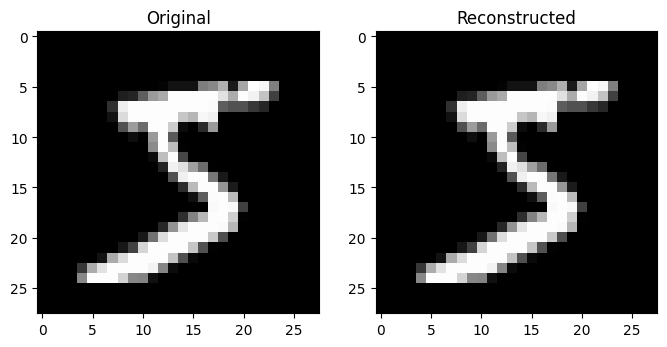

In [16]:
example_image = x_train[0]  # shape (28,28)

# Convert to float and normalize
example_image = example_image.astype(float) / 255.0

# Perform SVD on the single 28x28 image
U, S, Vt = np.linalg.svd(example_image, full_matrices=False)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

# Reconstruct the image using all singular values
reconstructed = (U @ np.diag(S) @ Vt)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(example_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Reconstructed")
plt.imshow(reconstructed, cmap='gray')
plt.show()

### **Part 4: Using SVD to Reduce Dimensionality of Many Images**


In [17]:
# Take a smaller subset for demonstration, e.g. 5000 images
subset_size = 5000
X = x_train_flat[:subset_size].astype(float) / 255.0  # Scale to [0,1]

print("Subset shape:", X.shape)

Subset shape: (5000, 784)


In [24]:
# Perform SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

U shape: (5000, 784)
S shape: (784,)
Vt shape: (784, 784)


### **Part 5: Truncated SVD for Dimensionality Reduction**

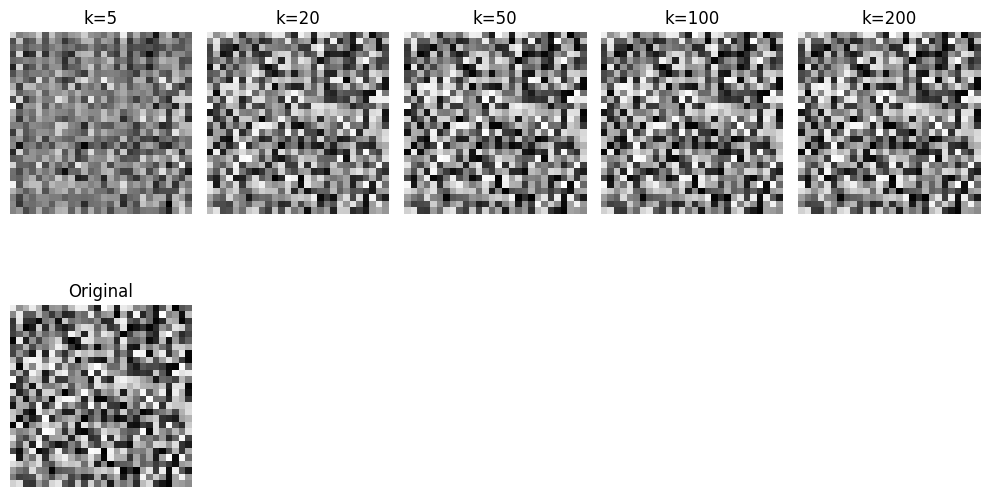

     k  Reconstruction Error
0    5          5.904350e+00
1   20          9.915417e-01
2   50          6.440766e-14
3  100          6.440766e-14
4  200          6.440766e-14


In [32]:
# Perform SVD on the example image
U, S, Vt = np.linalg.svd(example_image, full_matrices=False)

# Define k values for reconstruction
k_values = [5, 20, 50, 100, 200]

# Compute reconstruction errors and store results
reconstruction_errors = []

# Create subplots
plt.figure(figsize=(10, 6))

for i, k in enumerate(k_values):
    # Approximate the image using the first k singular values
    U_k = U[:, :k]  # First k columns of U
    S_k = np.diag(S[:k])  # k x k diagonal matrix
    Vt_k = Vt[:k, :]  # First k rows of Vt

    # Reconstruct the image
    reconstructed_image = U_k @ S_k @ Vt_k

    # Compute reconstruction error (Frobenius norm)
    error = np.linalg.norm(example_image - reconstructed_image, 'fro')
    reconstruction_errors.append((k, error))

    # Plot the reconstructed image
    plt.subplot(2, len(k_values), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"k={k}")
    plt.axis("off")

# Plot original image for reference
plt.subplot(2, len(k_values), len(k_values) + 1)
plt.imshow(example_image.reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis("off")

plt.tight_layout()
plt.show()

# Convert errors to a DataFrame and print
df_errors = pd.DataFrame(reconstruction_errors, columns=["k", "Reconstruction Error"])
print(df_errors)
